# 합성곱 신경망 이진분류 (cats and dogs - color 이미지)

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

## 1.데이터 준비

In [28]:
#!gdown https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR

In [29]:
#!unzip -q 'cats_and_dogs.zip'

In [30]:
data_root = './cats_and_dogs'
train_dir = data_root + '/train'
test_dir = data_root + '/test'

### 이미지 로딩

In [31]:
class_name = ['cat', 'dog']

In [32]:
import os

In [33]:
train_cats_fname = os.listdir(train_dir + '/cats')
train_dogs_fname = os.listdir(train_dir + '/dogs')

In [34]:
import PIL

In [35]:
X_train = []
y_train = []

In [36]:
for fname in train_cats_fname:
  image = PIL.Image.open(train_dir + '/cats/' + fname)
  image = image.resize((224, 224))
  arr = np.array(image)
  X_train.append(arr)
  y_train.append(0)

len(X_train), len(y_train)

(1300, 1300)

In [37]:
for fname in train_dogs_fname:
  image = PIL.Image.open(train_dir + '/dogs/' + fname)
  image = image.resize((224, 224))
  arr = np.array(image)
  X_train.append(arr)
  y_train.append(1)

len(X_train), len(y_train)

(2600, 2600)

In [38]:
X_train = np.array(X_train)
y_train = np.array(y_train)

## 2.데이터 분리

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [41]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2080, 224, 224, 3), (520, 224, 224, 3), (2080,), (520,))

In [42]:
samples = np.random.randint(2000, size=25)
samples

array([1351,  697,  594, 1584,   16,  263, 1792,  539,   55,  805,  433,
       1715, 1792, 1309, 1913, 1124, 1063, 1016,  942,  895,  188, 1605,
       1213,  123, 1289])

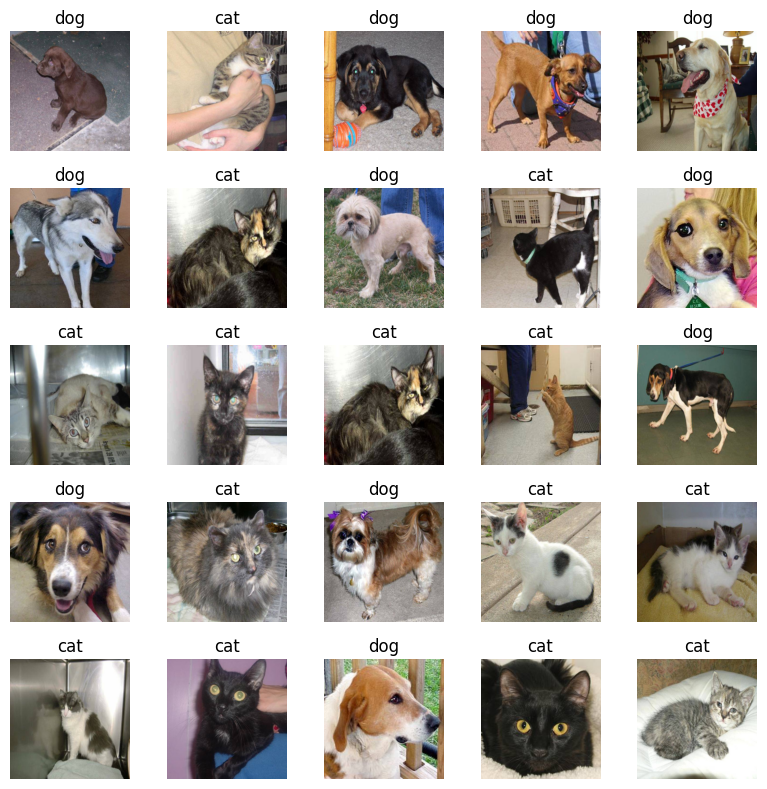

In [43]:
fig = plt.figure(figsize=(8, 8))

for i, idx in enumerate(samples):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(class_name[y_train[idx]])
plt.tight_layout()
plt.show()

### 스케일링

In [44]:
X_train_s = X_train/255.
X_val_s = X_val/255.

## 4.모델 만들기

In [45]:
from keras import layers

In [46]:
X_train_s.shape

(2080, 224, 224, 3)

In [47]:
X_train_s = X_train_s.reshape(-1, 224, 224, 3)
X_train_s.shape

(2080, 224, 224, 3)

In [48]:
X_val_s = X_val_s.reshape(-1, 224, 224, 3)
X_val_s.shape

(520, 224, 224, 3)

In [49]:
model = keras.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │       1,493,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,513,281 (5.77 MB)

 Trainable params: 1,513,281 (5.77 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [51]:
EPOCHS = 10
BATCHSIZE = 32

In [26]:
history = model.fit(
    X_train_s,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCHSIZE,
    validation_data=(X_val_s, y_val)
)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 243s 4s/step - acc: 0.5074 - loss: 0.7148 - val_acc: 0.5231 - val_loss: 0.6865
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 260s 4s/step - acc: 0.6263 - loss: 0.6669 - val_acc: 0.5981 - val_loss: 0.6812
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 266s 4s/step - acc: 0.7345 - loss: 0.5680 - val_acc: 0.6058 - val_loss: 0.6958
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - acc: 0.8214 - loss: 0.4195 - val_acc: 0.6000 - val_loss: 0.7482
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - acc: 0.9140 - loss: 0.2647 - val_acc: 0.6019 - val_loss: 0.8847
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - acc: 0.9506 - loss: 0.1420 - val_acc: 0.6019 - val_loss: 1.1876
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - acc: 0.9755 - loss: 0.0930 - val_acc: 0.5942 - val_loss: 1.6016
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 239s 4s/step - acc: 0.9948 - loss: 0.0332 - val_acc: 0.6000 - val_loss: 2.0921
Epoch 9/10
 3/65 ━━━━━━━━━━━━━━━━━━━━ 3:51 4s/step - acc: 1.0000

KeyboardInterrupt: 

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='train_acc')
    plt.plot(hist['epoch'], hist['val_acc'], label='val_acc')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

In [ ]:
plot_history(history)